In [14]:
import h5py
from skimage.morphology import label
import numpy as np
import matplotlib.pyplot as plt

In [43]:
h5 = h5py.File('deepEM3Dvalid_prob_h5/prob.h5', 'r')
list(h5.keys())
labels = h5['data']
labels.shape

(1024, 1024, 20)

In [25]:
h5 = h5py.File('DATA/full_c3.h5', 'r')
list(h5.keys())
raw = h5['data']
# labels.shape

In [49]:
h5 = h5py.File('DATA/raw_label.h5', 'r')
list(h5.keys())
gt_label = h5['label']
# labels.shape

In [44]:
inputs = np.array(labels)

In [45]:
inputs.shape

(1024, 1024, 20)

In [46]:
thre = 0.3

inputs[inputs >= thre] = 1
inputs[inputs < thre] = 0

In [52]:
%%time

seg = label(inputs, neighbors=4)

CPU times: user 312 ms, sys: 168 ms, total: 480 ms
Wall time: 480 ms


In [55]:
seg.min()

0

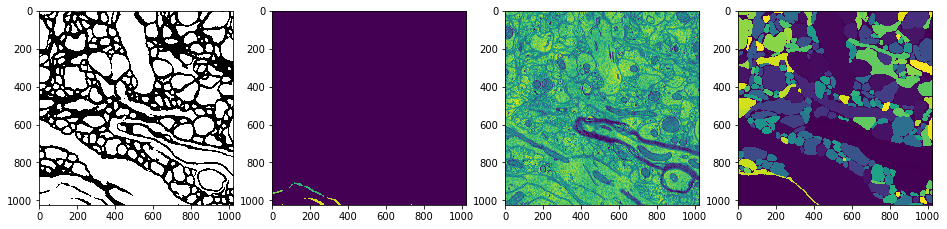

In [54]:
figure, ax = plt.subplots(1, 4, figsize=(16,5))

s = 0
ax[0].imshow(inputs[:,:,s], cmap='gray_r')
ax[1].imshow(seg[:,:,s])
ax[2].imshow(raw[:,:,s])
ax[3].imshow(gt_label[:,:,s])

In [37]:
seg_0 = label(inputs[:,:,0], neighbors=4)

In [42]:
input_0 = inputs[:,:,0]
input_0[0, 1023]  # 0 is neuron
input_0[1023, 1023]  # 1 is boundary

1.0

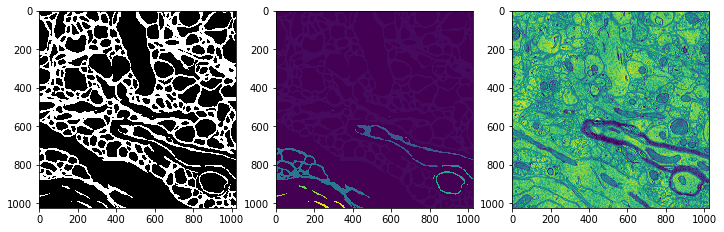

In [38]:
figure, ax = plt.subplots(1,3,figsize=(12,5))

s = 0
ax[0].imshow(inputs[:,:,s], cmap='gray')
ax[1].imshow(seg_0)
ax[2].imshow(raw[:,:,s])